# NAME: ABHAY UPADHYAYA
# BATCH: OCTOBER 2021
# TASK 1

# Prediction using Supervised ML

# Predict the percentage of an student based on the no. of study hours.
# This is a simple LINEAR REGRESSION task as it involves just two variables 
# HOURS, SCORES

In [3]:
# IMPORTING NECESSARY MODULES, LIBRARY,

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import warnings
warnings.filterwarnings('ignore')


# READING DATASET 

In [8]:
#READING DATASET AND DISPLAYING IT
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(17)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
#SHAPE OF DATA
df.shape

(25, 2)

In [10]:
#DATATYPES
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
#SUMMARY OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
# DESCRIPTION OF DATA
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#CHECKING CORELATION
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# VISUALIZING THE DATA

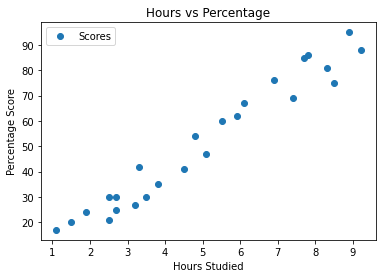

In [15]:
# PLOTTING THE DISTRIBUTION OF SCORES
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# DATA PREPARATION

In [17]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

# TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# TRAINING THE MODEL USING LINEAR REGRESSION ALGORITHM

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# VISUALIZING THE TRAINING DATASET

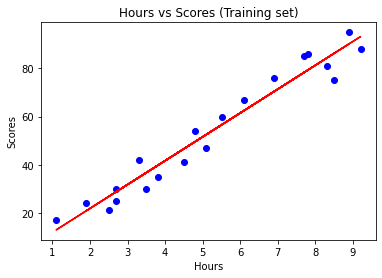

In [24]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# VISUALIZING THE TEST DATASET

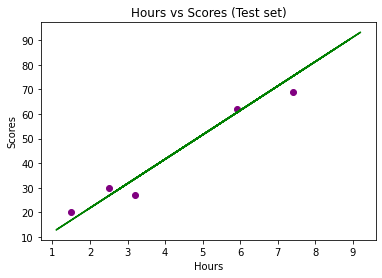

In [23]:
plt.scatter(X_test, y_test, color = 'purple')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# DOING PREDICTIONS

In [25]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
print("Training Score:",regressor.score(X_train,y_train))
print("Testing Score: ",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Testing Score:  0.9454906892105356


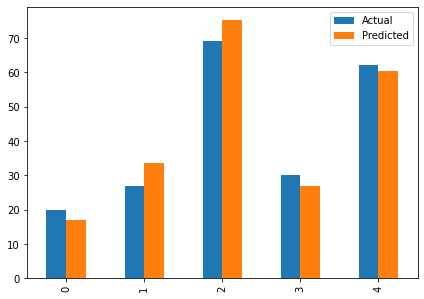

In [28]:
#plotting the actual and predicted value into bar graph
df.plot(kind="bar", figsize=(7,5))
plt.show()

In [29]:
#predicting for 9.25 hrs per day
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred_val=regressor.predict(test)
print("No. of hours=", hours)
print("Predicted Score=", pred_val[0])

No. of hours= 9.25
Predicted Score= 93.69173248737538


# MODEL EVALUATION

In [30]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Sqaured Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Explained Variance Score: ",metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Sqaured Error:  4.6474476121003665
Explained Variance Score:  0.9482829156738147


THE ABOVE EVALUATION GIVES INFORMATION ABOUT THE ERRORS